![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

In [2]:
#re-run everything from here if any parameters are changed
qb = QuantBook()
#ticker = qb.AddForex("EURUSD")
ticker = qb.AddEquity("SPY")
history = qb.History(qb.Securities.Keys, 14400, Resolution.Hour)
#history = qb.History(qb.Securities.Keys, 3600, Resolution.Daily)
#history = qb.History(qb.Securities.Keys, 3800, Resolution.Hour)

In [3]:
print(history)

                                           close        high         low  \
symbol           time                                                      
SPY R735QTJ8XC9X 2013-02-12 15:00:00  129.573266  129.649952  129.556225   
                 2013-02-12 16:00:00  129.513622  129.598828  129.436936   
                 2013-02-13 10:00:00  129.914091  129.948174  129.624390   
                 2013-02-13 11:00:00  129.803323  130.033380  129.718117   
                 2013-02-13 12:00:00  129.539183  129.820364  129.428415   
...                                          ...         ...         ...   
                 2021-04-27 12:00:00  417.535000  417.658900  416.951900   
                 2021-04-27 13:00:00  417.090000  417.735000  416.980000   
                 2021-04-27 14:00:00  417.393300  417.570000  417.050000   
                 2021-04-27 15:00:00  417.610000  417.820000  417.070000   
                 2021-04-27 16:00:00  417.520000  418.140000  417.260000   

           

In [4]:
#drop column from multi-index. Time is now the index
history = history.reset_index(level=0, drop=True)
history = history.reset_index(level=0)
history.head()

time       close        high         low        open  \
0 2013-02-12 15:00:00  129.573266  129.649952  129.556225  129.632910   
1 2013-02-12 16:00:00  129.513622  129.598828  129.436936  129.573266   
2 2013-02-13 10:00:00  129.914091  129.948174  129.624390  129.786282   
3 2013-02-13 11:00:00  129.803323  130.033380  129.718117  129.905571   
4 2013-02-13 12:00:00  129.539183  129.820364  129.428415  129.794802   

       volume  
0   5286111.0  
1  12128945.0  
2  10694854.0  
3  11897716.0  
4  10550596.0

In [5]:
import datetime

In [6]:
date_time = pd.to_datetime(history.pop('time'), format='%d.%m.%Y %H:%M:%S')
date_time.head()

0   2013-02-12 15:00:00
1   2013-02-12 16:00:00
2   2013-02-13 10:00:00
3   2013-02-13 11:00:00
4   2013-02-13 12:00:00
Name: time, dtype: datetime64[ns]

In [7]:
#converting date time to seconds
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [8]:
timestamp_s

0        1.360681e+09
1        1.360685e+09
2        1.360750e+09
3        1.360753e+09
4        1.360757e+09
             ...     
14395    1.619525e+09
14396    1.619528e+09
14397    1.619532e+09
14398    1.619536e+09
14399    1.619539e+09
Name: time, Length: 14400, dtype: float64

In [9]:
day = 24*60*60
week = 7 * day
year = (365.2425)*day

history['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
history['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
history['Week sin'] = np.sin(timestamp_s * (2 * np.pi / week))
history['Week cos'] = np.cos(timestamp_s * (2 * np.pi / week))
history['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
history['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [10]:
history

close        high         low        open      volume  \
0      129.573266  129.649952  129.556225  129.632910   5286111.0   
1      129.513622  129.598828  129.436936  129.573266  12128945.0   
2      129.914091  129.948174  129.624390  129.786282  10694854.0   
3      129.803323  130.033380  129.718117  129.905571  11897716.0   
4      129.539183  129.820364  129.428415  129.794802  10550596.0   
...           ...         ...         ...         ...         ...   
14395  417.535000  417.658900  416.951900  417.170000   5857072.0   
14396  417.090000  417.735000  416.980000  417.535000   4633236.0   
14397  417.393300  417.570000  417.050000  417.090000   2477993.0   
14398  417.610000  417.820000  417.070000  417.400000   6469349.0   
14399  417.520000  418.140000  417.260000  417.600000  13542110.0   

            Day sin  Day 19LO  Week sin  Week 19LO  Year sin  Year 19LO  
0     -7.071068e-01 -0.707107 -0.943883   0.330279  0.676586   0.736363  
1     -8.660254e-01 -0.500000 -0.930874   0.365341  0.677114   0.735878  
2      5.000000e-01 -0.866025 -0.500000   0.866025  0.686552   0.727081  
3      2.588190e-01 -0.965926 -0.467269   0.884115  0.687073   0.726589  
4      2.951573e-12 -1.000000 -0.433884   0.900969  0.687593   0.726096  
...             ...       ...       ...        ...       ...        ...  
14395  7.273377e-12 -1.000000 -0.974928   0.222521  0.902951  -0.429743  
14396 -2.588190e-01 -0.965926 -0.965926   0.258819  0.902643  -0.430390  
14397 -5.000000e-01 -0.866025 -0.955573   0.294755  0.902334  -0.431037  
14398 -7.071068e-01 -0.707107 -0.943883   0.330279  0.902025  -0.431684  
14399 -8.660254e-01 -0.500000 -0.930874   0.365341  0.901715  -0.432330  

[14400 rows x 11 columns]

Text(0.5, 1.0, 'Time of day signal')

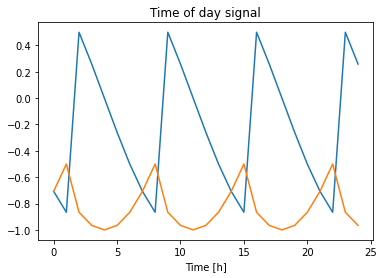

In [11]:
plt.plot(np.array(history['Day sin'])[:25])
plt.plot(np.array(history['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [12]:
history.describe().transpose()

count          mean           std           min           25%  \
close      14400.0  2.294334e+02  6.545535e+01  1.269660e+02  1.787123e+02   
high       14400.0  2.298434e+02  6.560220e+01  1.273494e+02  1.790742e+02   
low        14400.0  2.289865e+02  6.528722e+01  1.267274e+02  1.782261e+02   
open       14400.0  2.294291e+02  6.545592e+01  1.270426e+02  1.786426e+02   
volume     14400.0  1.217041e+07  8.916305e+06  1.319514e+06  6.326003e+06   
Day sin    14400.0 -2.229654e-01  4.675216e-01 -8.660254e-01 -7.071068e-01   
Day 19LO   14400.0 -8.392675e-01  1.654000e-01 -1.000000e+00 -9.659258e-01   
Week sin   14400.0 -1.434211e-01  7.494757e-01 -9.888308e-01 -8.467242e-01   
Week 19LO  14400.0  3.427314e-01  5.480069e-01 -6.801727e-01  1.490423e-01   
Year sin   14400.0  2.026574e-02  7.179512e-01 -1.000000e+00 -7.060238e-01   
Year 19LO  14400.0 -5.853837e-03  6.958236e-01 -1.000000e+00 -6.940662e-01   

                    50%           75%           max  
close      2.185177e+02  2.735043e+02  4.180901e+02  
high       2.187761e+02  2.742694e+02  4.182499e+02  
low        2.182213e+02  2.728542e+02  4.177000e+02  
open       2.185038e+02  2.734907e+02  4.180900e+02  
volume     9.616466e+06  1.523249e+07  1.124297e+08  
Day sin   -2.588190e-01  2.588190e-01  5.000000e-01  
Day 19LO  -8.660254e-01 -7.071068e-01 -5.000000e-01  
Week sin  -3.998920e-01  5.320321e-01  9.972038e-01  
Week 19LO  2.947552e-01  8.841154e-01  9.555728e-01  
Year sin   5.067272e-02  7.527026e-01  1.000000e+00  
Year 19LO -2.605501e-03  6.708392e-01  1.000000e+00

In [13]:
history.index = date_time

In [14]:
history.head()

close        high         low        open  \
time                                                                  
2013-02-12 15:00:00  129.573266  129.649952  129.556225  129.632910   
2013-02-12 16:00:00  129.513622  129.598828  129.436936  129.573266   
2013-02-13 10:00:00  129.914091  129.948174  129.624390  129.786282   
2013-02-13 11:00:00  129.803323  130.033380  129.718117  129.905571   
2013-02-13 12:00:00  129.539183  129.820364  129.428415  129.794802   

                         volume       Day sin  Day 19LO  Week sin  Week 19LO  \
time                                                                           
2013-02-12 15:00:00   5286111.0 -7.071068e-01 -0.707107 -0.943883   0.330279   
2013-02-12 16:00:00  12128945.0 -8.660254e-01 -0.500000 -0.930874   0.365341   
2013-02-13 10:00:00  10694854.0  5.000000e-01 -0.866025 -0.500000   0.866025   
2013-02-13 11:00:00  11897716.0  2.588190e-01 -0.965926 -0.467269   0.884115   
2013-02-13 12:00:00  10550596.0  2.951573e-12 -1.000000 -0.433884   0.900969   

                     Year sin  Year 19LO  
time                                      
2013-02-12 15:00:00  0.676586   0.736363  
2013-02-12 16:00:00  0.677114   0.735878  
2013-02-13 10:00:00  0.686552   0.727081  
2013-02-13 11:00:00  0.687073   0.726589  
2013-02-13 12:00:00  0.687593   0.726096

In [15]:
df = history[:]
df.head()

close        high         low        open  \
time                                                                  
2013-02-12 15:00:00  129.573266  129.649952  129.556225  129.632910   
2013-02-12 16:00:00  129.513622  129.598828  129.436936  129.573266   
2013-02-13 10:00:00  129.914091  129.948174  129.624390  129.786282   
2013-02-13 11:00:00  129.803323  130.033380  129.718117  129.905571   
2013-02-13 12:00:00  129.539183  129.820364  129.428415  129.794802   

                         volume       Day sin  Day 19LO  Week sin  Week 19LO  \
time                                                                           
2013-02-12 15:00:00   5286111.0 -7.071068e-01 -0.707107 -0.943883   0.330279   
2013-02-12 16:00:00  12128945.0 -8.660254e-01 -0.500000 -0.930874   0.365341   
2013-02-13 10:00:00  10694854.0  5.000000e-01 -0.866025 -0.500000   0.866025   
2013-02-13 11:00:00  11897716.0  2.588190e-01 -0.965926 -0.467269   0.884115   
2013-02-13 12:00:00  10550596.0  2.951573e-12 -1.000000 -0.433884   0.900969   

                     Year sin  Year 19LO  
time                                      
2013-02-12 15:00:00  0.676586   0.736363  
2013-02-12 16:00:00  0.677114   0.735878  
2013-02-13 10:00:00  0.686552   0.727081  
2013-02-13 11:00:00  0.687073   0.726589  
2013-02-13 12:00:00  0.687593   0.726096

In [16]:
#setting X(features) #setting index as time
X = df[:-1]
print(X)

                          close        high         low        open  \
time                                                                  
2013-02-12 15:00:00  129.573266  129.649952  129.556225  129.632910   
2013-02-12 16:00:00  129.513622  129.598828  129.436936  129.573266   
2013-02-13 10:00:00  129.914091  129.948174  129.624390  129.786282   
2013-02-13 11:00:00  129.803323  130.033380  129.718117  129.905571   
2013-02-13 12:00:00  129.539183  129.820364  129.428415  129.794802   
...                         ...         ...         ...         ...   
2021-04-27 11:00:00  417.170000  417.350000  416.300000  416.850000   
2021-04-27 12:00:00  417.535000  417.658900  416.951900  417.170000   
2021-04-27 13:00:00  417.090000  417.735000  416.980000  417.535000   
2021-04-27 14:00:00  417.393300  417.570000  417.050000  417.090000   
2021-04-27 15:00:00  417.610000  417.820000  417.070000  417.400000   

                         volume       Day sin  Day 19LO  Week sin  Week 19LO

In [17]:
y = df.close[1:]
y

time
2013-02-12 16:00:00    129.513622
2013-02-13 10:00:00    129.914091
2013-02-13 11:00:00    129.803323
2013-02-13 12:00:00    129.539183
2013-02-13 13:00:00    129.607349
                          ...    
2021-04-27 12:00:00    417.535000
2021-04-27 13:00:00    417.090000
2021-04-27 14:00:00    417.393300
2021-04-27 15:00:00    417.610000
2021-04-27 16:00:00    417.520000
Name: close, Length: 14399, dtype: float64

In [18]:
#splitting to training and test data
split_fraction = 0.715
train_split = int(split_fraction * int(X.shape[0]))
train_split

10295

In [19]:
X_train_max = X[:train_split].max(axis=0)
X_train_min = X[:train_split].min(axis=0)
X_train_norm = (X[:train_split] - X_train_min) / (X_train_max - X_train_min)
X_train_norm

close      high       low      open    volume  \
time                                                                    
2013-02-12 15:00:00  0.017079  0.015077  0.018509  0.016947  0.035700   
2013-02-12 16:00:00  0.016689  0.014742  0.017728  0.016556  0.097286   
2013-02-13 10:00:00  0.019312  0.017031  0.018955  0.017950  0.084379   
2013-02-13 11:00:00  0.018586  0.017590  0.019568  0.018731  0.095205   
2013-02-13 12:00:00  0.016856  0.016194  0.017672  0.018006  0.083080   
...                       ...       ...       ...       ...       ...   
2018-12-21 12:00:00  0.711212  0.721290  0.710422  0.721949  0.216372   
2018-12-21 13:00:00  0.700393  0.710906  0.694903  0.709824  0.280294   
2018-12-21 14:00:00  0.700770  0.706375  0.698044  0.699332  0.159093   
2018-12-21 15:00:00  0.696807  0.701403  0.694149  0.699269  0.158694   
2018-12-21 16:00:00  0.682402  0.697313  0.678693  0.695499  0.507373   

                          Day sin  Day 19LO  Week sin  Week 19LO  Year sin  \
time                                                                         
2013-02-12 15:00:00  1.163365e-01  0.585786  0.022632   0.617732  0.838293   
2013-02-12 16:00:00  3.903589e-13  1.000000  0.029182   0.639167  0.838557   
2013-02-13 10:00:00  1.000000e+00  0.267949  0.246134   0.945256  0.843276   
2013-02-13 11:00:00  8.234433e-01  0.068148  0.262615   0.956315  0.843536   
2013-02-13 12:00:00  6.339746e-01  0.000000  0.279425   0.966618  0.843797   
...                           ...       ...       ...        ...       ...   
2018-12-21 12:00:00  6.339746e-01  0.000000  0.988784   0.551855  0.411170   
2018-12-21 13:00:00  4.445059e-01  0.068148  0.992630   0.529474  0.411523   
2018-12-21 14:00:00  2.679492e-01  0.267949  0.995784   0.506934  0.411876   
2018-12-21 15:00:00  1.163365e-01  0.585786  0.998242   0.484267  0.412228   
2018-12-21 16:00:00  2.782252e-12  1.000000  1.000000   0.461504  0.412581   

                     Year 19LO  
time                            
2013-02-12 15:00:00   0.868182  
2013-02-12 16:00:00   0.867939  
2013-02-13 10:00:00   0.863540  
2013-02-13 11:00:00   0.863294  
2013-02-13 12:00:00   0.863048  
...                        ...  
2018-12-21 12:00:00   0.992046  
2018-12-21 13:00:00   0.992110  
2018-12-21 14:00:00   0.992173  
2018-12-21 15:00:00   0.992236  
2018-12-21 16:00:00   0.992299  

[10295 rows x 11 columns]

In [20]:
X_test_norm = (X[train_split:] - X_train_min) / (X_train_max - X_train_min)
X_test_norm

close      high       low      open    volume  \
time                                                                    
2018-12-24 10:00:00  0.661518  0.675790  0.657268  0.670369  0.182167   
2018-12-24 11:00:00  0.669255  0.677615  0.652995  0.660128  0.328250   
2018-12-24 12:00:00  0.654787  0.670441  0.653812  0.668044  0.234597   
2018-12-24 13:00:00  0.642395  0.657602  0.643194  0.653783  0.344605   
2018-12-26 10:00:00  0.650258  0.662259  0.650796  0.650893  0.156141   
...                       ...       ...       ...       ...       ...   
2021-04-27 11:00:00  1.901011  1.900530  1.894625  1.896045  0.055441   
2021-04-27 12:00:00  1.903402  1.902554  1.898890  1.898139  0.040838   
2021-04-27 13:00:00  1.900487  1.903053  1.899074  1.900527  0.029824   
2021-04-27 14:00:00  1.902474  1.901972  1.899532  1.897615  0.010426   
2021-04-27 15:00:00  1.903894  1.903610  1.899663  1.899643  0.046349   

                      Day sin  Day 19LO  Week sin     Week 19LO  Year sin  \
time                                                                        
2018-12-24 10:00:00  1.000000  0.267949  0.128789  4.972347e-13  0.435960   
2018-12-24 11:00:00  0.823443  0.068148  0.116241  1.704747e-02  0.436315   
2018-12-24 12:00:00  0.633975  0.000000  0.104227  3.465266e-02  0.436671   
2018-12-24 13:00:00  0.444506  0.068148  0.092764  5.279094e-02  0.437026   
2018-12-26 10:00:00  1.000000  0.267949  0.246134  9.452559e-01  0.453055   
...                       ...       ...       ...           ...       ...   
2021-04-27 11:00:00  0.823443  0.068148  0.003154  5.294738e-01  0.951630   
2021-04-27 12:00:00  0.633975  0.000000  0.007000  5.518546e-01  0.951476   
2021-04-27 13:00:00  0.444506  0.068148  0.011533  5.740451e-01  0.951322   
2021-04-27 14:00:00  0.267949  0.267949  0.016746  5.960144e-01  0.951167   
2021-04-27 15:00:00  0.116337  0.585786  0.022632  6.177317e-01  0.951013   

                     Year 19LO  
time                            
2018-12-24 10:00:00   0.995882  
2018-12-24 11:00:00   0.995928  
2018-12-24 12:00:00   0.995973  
2018-12-24 13:00:00   0.996018  
2018-12-26 10:00:00   0.997791  
...                        ...  
2021-04-27 11:00:00   0.285452  
2021-04-27 12:00:00   0.285129  
2021-04-27 13:00:00   0.284805  
2021-04-27 14:00:00   0.284482  
2021-04-27 15:00:00   0.284158  

[4104 rows x 11 columns]

In [21]:
#setting y (labels)
y_train = y[:train_split]
y_test = y[train_split:]
y_train

time
2013-02-12 16:00:00    129.513622
2013-02-13 10:00:00    129.914091
2013-02-13 11:00:00    129.803323
2013-02-13 12:00:00    129.539183
2013-02-13 13:00:00    129.607349
                          ...    
2018-12-21 13:00:00    233.886308
2018-12-21 14:00:00    233.943925
2018-12-21 15:00:00    233.338947
2018-12-21 16:00:00    231.139901
2018-12-24 10:00:00    227.951765
Name: close, Length: 10295, dtype: float64

In [22]:
y_test

time
2018-12-24 11:00:00    229.132912
2018-12-24 12:00:00    226.924263
2018-12-24 13:00:00    225.032507
2018-12-26 10:00:00    226.232860
2018-12-26 11:00:00    224.811642
                          ...    
2021-04-27 12:00:00    417.535000
2021-04-27 13:00:00    417.090000
2021-04-27 14:00:00    417.393300
2021-04-27 15:00:00    417.610000
2021-04-27 16:00:00    417.520000
Name: close, Length: 4104, dtype: float64

In [23]:
print(X_train_norm)
print(y_train)

                        close      high       low      open    volume  \
time                                                                    
2013-02-12 15:00:00  0.017079  0.015077  0.018509  0.016947  0.035700   
2013-02-12 16:00:00  0.016689  0.014742  0.017728  0.016556  0.097286   
2013-02-13 10:00:00  0.019312  0.017031  0.018955  0.017950  0.084379   
2013-02-13 11:00:00  0.018586  0.017590  0.019568  0.018731  0.095205   
2013-02-13 12:00:00  0.016856  0.016194  0.017672  0.018006  0.083080   
...                       ...       ...       ...       ...       ...   
2018-12-21 12:00:00  0.711212  0.721290  0.710422  0.721949  0.216372   
2018-12-21 13:00:00  0.700393  0.710906  0.694903  0.709824  0.280294   
2018-12-21 14:00:00  0.700770  0.706375  0.698044  0.699332  0.159093   
2018-12-21 15:00:00  0.696807  0.701403  0.694149  0.699269  0.158694   
2018-12-21 16:00:00  0.682402  0.697313  0.678693  0.695499  0.507373   

                          Day sin  Day 19LO  Week 

In [24]:
#Number of features used for training
X_train_norm.shape[1]
print("Number of features used for training : " + str(X_train_norm.shape[1]))

Number of features used for training : 11


In [25]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.optimizers import SGD
from keras.utils.generic_utils import serialize_keras_object
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [26]:
model = Sequential() #Sequential Model used
model.add(Dense(100, input_dim = X_train_norm.shape[1], activation='relu')) #1st hidden layer Dense layers with activation 'relu(rectified linear unit)' function.
#model.add(BatchNormalization())
model.add(Dense(50, activation='relu')) #2nd hidden layer, 50 nodes
#model.add(BatchNormalization())
model.add(Dense(25, activation='relu')) #3rd hidden layer, 25 nodes
#model.add(BatchNormalization())
model.add(Dense(12, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(1)) #Output layer, single output
sgd = SGD(lr = 0.01)   # learning rate = 0.01 for use with sgd only

#Loss function used is Mean Squared Error. sgd(Stochastic Gradient Descent) etc. can also be used.
model.compile(loss='mse', optimizer='adam', metrics=['mae']) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [27]:
#function to stop learning when loss function does not show improvement for 5 continuous epochs 
early_stopping_monitor = EarlyStopping(patience=5)

In [28]:
#code for use if loss function is set as 'sgd'
#for step in range(200):
#    cost = model.train_on_batch(predictor, predictand)
#    print(cost)

In [29]:
#for use with mse only. fitting data to model. 70% used for training, 30% used for validation. epochs set to 100 but will terminate early if no improvement in loss
#trained_model = model.fit(X_train_norm, y_train, validation_data =(X_test_norm, y_test), epochs=100, callbacks=[early_stopping_monitor], metrics=['accuracy'])
trained_model = model.fit(X_train_norm, y_train, validation_data =(X_test_norm, y_test), epochs=200, callbacks=[early_stopping_monitor])


Train on 10295 samples, validate on 4104 samples
Epoch 1/200
10295/10295 [==============================] - 531s 52ms/step - loss: 8892.1375 - mae: 59.1904 - val_loss: 488.3667 - val_mae: 17.7042
Epoch 2/200
10295/10295 [==============================] - 581s 56ms/step - loss: 119.5711 - mae: 8.4710 - val_loss: 50.8304 - val_mae: 5.4197
Epoch 3/200
10295/10295 [==============================] - 579s 56ms/step - loss: 5.4487 - mae: 1.6787 - val_loss: 4.0453 - val_mae: 1.4057
Epoch 4/200
10295/10295 [==============================] - 575s 56ms/step - loss: 1.0387 - mae: 0.7412 - val_loss: 2.8112 - val_mae: 1.0830
Epoch 5/200
10295/10295 [==============================] - 563s 55ms/step - loss: 0.6558 - mae: 0.5735 - val_loss: 2.6008 - val_mae: 1.0146
Epoch 6/200
10295/10295 [==============================] - 585s 57ms/step - loss: 0.5157 - mae: 0.4902 - val_loss: 2.6749 - val_mae: 1.0192
Epoch 7/200
10295/10295 [==============================] - 571s 55ms/step - loss: 0.4992 - mae: 0.48

In [30]:
#summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [31]:
#prediction results using model
X_norm = (df - X_train_min) / (X_train_max - X_train_min)
prediction = model.predict(X_norm)
print(prediction)

[[129.39296]
 [129.57462]
 [129.05682]
 ...
 [416.52866]
 [416.7263 ]
 [416.85828]]


In [32]:
prediction.shape

(14400, 1)

In [33]:
#Combining History and Prediction into one dataframe for plotting
df['prediction'] = prediction

In [39]:
prediction_df = df[['high','low', 'close','prediction']]
#prediction_df['time'] =pd.to_datetime(prediction_df['time'])
print(prediction_df)

                           high         low       close  prediction
time                                                               
2013-02-12 15:00:00  129.649952  129.556225  129.573266  129.392960
2013-02-12 16:00:00  129.598828  129.436936  129.513622  129.574615
2013-02-13 10:00:00  129.948174  129.624390  129.914091  129.056824
2013-02-13 11:00:00  130.033380  129.718117  129.803323  128.990540
2013-02-13 12:00:00  129.820364  129.428415  129.539183  128.897690
...                         ...         ...         ...         ...
2021-04-27 12:00:00  417.658900  416.951900  417.535000  416.574005
2021-04-27 13:00:00  417.735000  416.980000  417.090000  416.572388
2021-04-27 14:00:00  417.570000  417.050000  417.393300  416.528656
2021-04-27 15:00:00  417.820000  417.070000  417.610000  416.726288
2021-04-27 16:00:00  418.140000  417.260000  417.520000  416.858276

[14400 rows x 4 columns]


In [40]:
prediction_df = prediction_df.reset_index()

In [44]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=prediction_df['time'], y=prediction_df['high'],
                    mode='lines',
                    name='High Price'))
fig.add_trace(go.Scatter(x=prediction_df['time'], y=prediction_df['low'],
                    mode='lines',
                    name='Low Price'))

fig.add_trace(go.Scatter(x=prediction_df['time'], y=prediction_df['close'],
                    mode='lines',
                    name='Close Price'))
fig.add_trace(go.Scatter(x=prediction_df['time'], y=prediction_df['prediction'],
                    mode='lines',
                    name='Predicted Close Price'))
fig.update_layout(title=str(ticker.Symbol)+' Close Price vs Predicted Close Price',
                   xaxis_title='Date',
                   yaxis_title='Price($)')
fig.show()

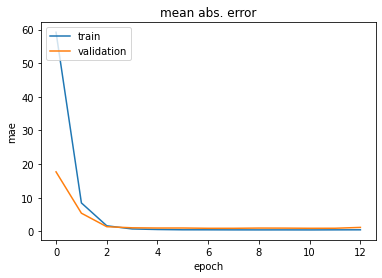

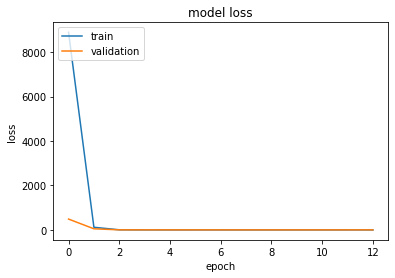

In [37]:
#import matplotlib.pyplot
import matplotlib.pyplot as plt

#plot mean absolute error
plt.plot(trained_model.history['mae'])
plt.plot(trained_model.history['val_mae'])
plt.title('mean abs. error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#plot loss function 
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()